**Interpolacja**

In [71]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

**Zadanie 1.**

In [72]:
# Data
year = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537,  123202624, 132164569, 
                        151325798, 179323175, 203302031,  226542199])

# φ functions
phi_1 = np.vectorize(lambda t, j: np.double(t**(j-1)), excluded=['j'])
phi_2 = np.vectorize(lambda t, j: np.double((t-1900)**(j-1)), excluded=['j'])
phi_3 = np.vectorize(lambda t, j: np.double((t-1940)**(j-1)), excluded=['j'])
phi_4 = np.vectorize(lambda t, j: np.double(((t-1940)/40)**(j-1)), excluded=['j'])

# Vandermonde matrices
V_1 = np.matrix([phi_1(year, j) for j in range(1, 10)]).T
V_2 = np.matrix([phi_2(year, j) for j in range(1, 10)]).T
V_3 = np.matrix([phi_3(year, j) for j in range(1, 10)]).T
V_4 = np.matrix([phi_4(year, j) for j in range(1, 10)]).T

# Matrices' condition numbers
cond = np.array([np.linalg.cond(V_1), np.linalg.cond(V_2), np.linalg.cond(V_3), np.linalg.cond(V_4)])

# for i in range(1,5): print("Matrix V_"+str(i)+": {:e}".format(cond[i-1]))

# Coefficient calculation
c = scipy.linalg.solve(V_4, population)

# W.G. Horner Algorithm
def horner(base, coefficients):
    n = len(coefficients) - 1
    W = coefficients[-1]
    for i in range(n-1, -1, -1):
        W = W*base + coefficients[i]
    return W

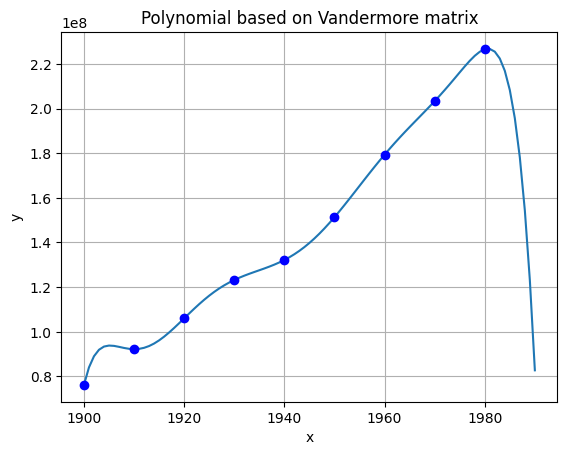

In [73]:
# Polynomial plot
arguments = range(1900,1991)
values = np.array([horner(phi_4(t, 2), c) for t in arguments])
plt.plot(arguments, values)
plt.plot(year, population, 'bo')
plt.title("Polynomial based on Vandermore matrix")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [74]:
# Extrapolation
extrapolated_value = values[-1]
real_value = 248709873
relative_error = np.abs(extrapolated_value-real_value)/real_value
print(relative_error)

0.6672864651416454


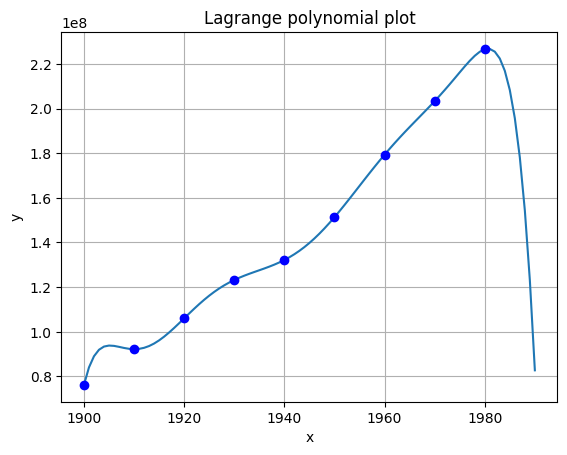

In [75]:
# Lagrange polynomial
l = lambda t, j: np.prod(t-year[year!=year[j]])/np.prod(year[j]-year[year!=year[j]])
p_8 = lambda t: np.sum([population[j] * l(t, j) for j in range(9)])

# Lagrange polynomial plot
arguments = range(1900,1991)
values = np.array([p_8(t) for t in arguments])
plt.plot(arguments, values)
plt.plot(year, population, 'bo')
plt.title("Lagrange polynomial plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()